In [1]:
"""Questions 
Which percentage of airline passengers are satisfied? Does it vary by customer type? What about type of travel?

What is the customer profile for a repeating airline passenger?

Does flight distance affect customer preferences or flight patterns?"""


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\qakan\Downloads\Airline+Passenger+Satisfaction (1)\airline_passenger_satisfaction.csv')

#explore dataset
#df.dtypes
#df.info()

#the arrival delay column has 393 missing attributes.These will be replaced by the mean value of the column

avg_arr_delay=df["Arrival Delay"].mean()
df["Arrival Delay"].replace(np.nan,avg_arr_delay,inplace=True)

#convert departure delay and arrival delay columns to days from minutes and rename the columns accordingly
df["Departure Delay"]=df["Departure Delay"]/60/24
df["Arrival Delay"]=df["Arrival Delay"]/60/24

df.rename(columns={"Departure Delay": "Departure Delay (Days)"}, inplace=True)
df.rename(columns={"Arrival Delay": "Arrival Delay (Days)"}, inplace=True)

#binning the flight distance column into short, medium and long haul flight buckets and merging to dataframe
#flight_bins=np.linspace(min(df["Flight Distance"]),max(df["Flight Distance"]), 4)
#label_names= ["Short Haul Flight", "Medium Haul Flight", "Long Haul Flight"]
#df["Flight Distance Bins"]=pd.cut(df["Flight Distance"], flight_bins, labels=label_names, include_lowest=True)

flight_bin=[]

for value in df["Flight Distance"]:
    if value<801:
        flight_bin.append("Short Haul Flight")
    elif value<2200:
        flight_bin.append("Medium Haul Flight")
    else:
        flight_bin.append("Long Haul Flight")

flight_bin=pd.DataFrame (flight_bin, columns = ['Flight Distance Bins'])
df=pd.concat([df,flight_bin],axis=1)

#binning the age column and merging to main dataframe

age_bin=[]

for value in df["Age"]:
    if value<18:
        age_bin.append("Minor")
    elif value<29:
        age_bin.append("Young Adult")
    elif value<41:
        age_bin.append("Adult")
    elif value<60:
        age_bin.append("Middle Aged")
    else:
        age_bin.append("Elderly")

age_bin=pd.DataFrame (age_bin, columns = ['Age Bins'])
df=pd.concat([df,age_bin],axis=1)

#creating numerical values for the satisfaction column and merging to main dataframe

satisfaction_num=[]

for value in df["Satisfaction"]:
    if value== "Satisfied":
        satisfaction_num.append(1)
    else:
        satisfaction_num.append(0)

satisfaction_num=pd.DataFrame (satisfaction_num, columns = ['Satisfaction Value'])
df=pd.concat([df,satisfaction_num],axis=1)

#Create dummy variables for the satisfaction column
#satisfaction_dummies=pd.get_dummies(df["Satisfaction"])
#merge dummy_var to the main dataframe
#df=pd.concat([df,satisfaction_dummies],axis=1)

#confirm data
#df.head(20)

#print(df.columns.to_list())

#check correlation
#df.corr()
#export data for visualization on dashboard
#df.to_csv("cleaned airline data.csv", index=False)

Percentage of Airline Passengers Satisfied: 43.45%


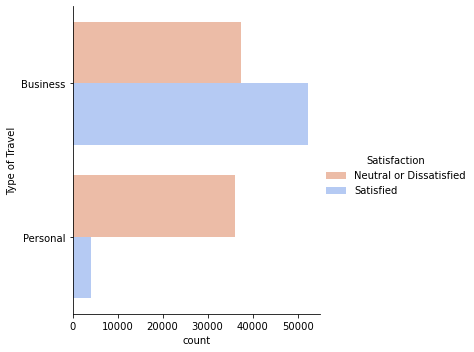

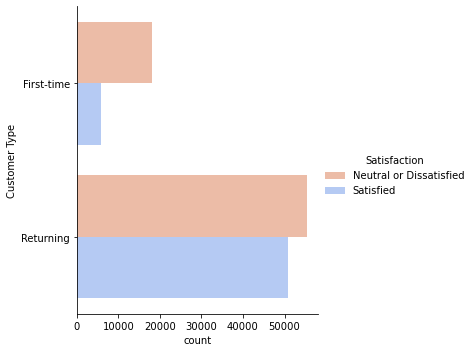

In [3]:
#Question 1: Which percentage of airline passengers are satisfied? Does it vary by customer type? What about type of travel?

#total satisfaction 
satisfied_total=0
for value in df['Satisfaction']:
    if value=="Satisfied":
        satisfied_total+=1
    else:
        satisfied_total+=0
        
percent_satisfaction=(satisfied_total/df['ID'].count())*100
print(f'Percentage of Airline Passengers Satisfied: {percent_satisfaction.round(2)}%')

#Satisfaction by customer type

df_group_one = df[["Customer Type", "Satisfaction"]]
df_group_one=df_group_one.groupby("Customer Type")["Satisfaction"].value_counts(normalize=True)
df_group_one

#Satisfaction by type of travel

df_group_two = df[["Type of Travel", "Satisfaction"]]
df_group_two=df_group_two.groupby("Type of Travel")["Satisfaction"].value_counts(normalize=True)
df_group_two

sns.catplot(y="Type of Travel", hue="Satisfaction", kind="count",
            palette="coolwarm_r",
            data=df)

sns.catplot(y="Customer Type", hue="Satisfaction", kind="count",
            palette="coolwarm_r",
            data=df)



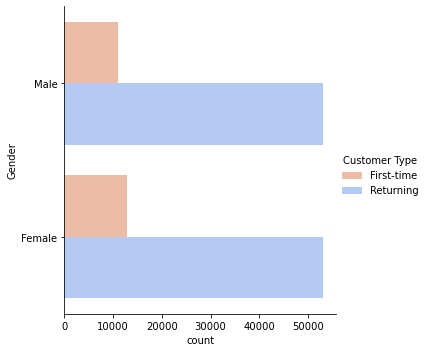

In [4]:
#Question 2: What is the customer profile for a returning airline passenger?
#Answer: The customer profile for a returning airline passenger is any gender, middle aged(between 41-60 years), 
#travelling for business, on business class and on a short haul flight (distance less than 800 miles).


#the columns to be used in building the profile are: age, gender, customer type, type of travel, flight distance, and class.

#checking return rate per gender
df_gender = df[["Gender", "Customer Type"]]
df_gender=df_gender.groupby("Gender")["Customer Type"].value_counts()/df['Customer Type'].value_counts()['Returning']
#df_gender 
#Gender  Customer Type
#Female  Returning        0.500057
#Male    Returning        0.499943

sns.catplot(y="Gender", hue="Customer Type", kind="count",
            palette="coolwarm_r",
            data=df)

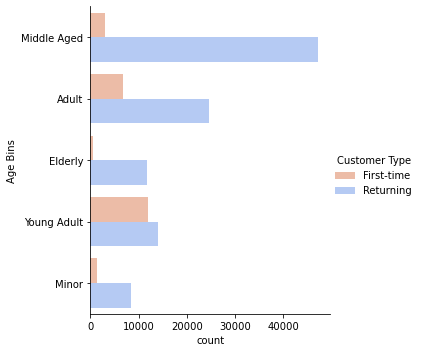

In [5]:
#checking return rate based on age 
df_age = df[["Age Bins", "Customer Type"]]
df_age=(df_age.groupby("Age Bins")["Customer Type"].value_counts())/df['Customer Type'].value_counts()['Returning']
#df_age

#age plays a part in return rate of customers with the following results: 

#Age Bins     Customer Type
#Adult        Returning        0.232196
#Elderly      Returning        0.110141
#Middle Aged  Returning        0.445495
#Minor        Returning        0.079293
#Young Adult  Returning        0.132875

sns.catplot(y="Age Bins", hue="Customer Type", kind="count",
            palette="coolwarm_r",
            data=df)

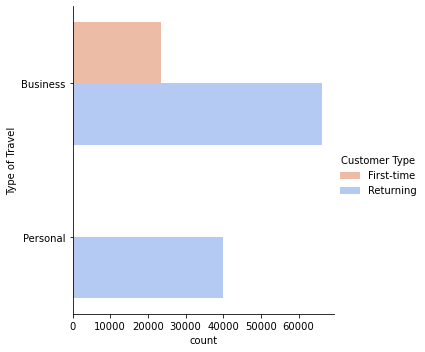

In [6]:
#checking return rate based on type of travel 
df_travel = df[["Type of Travel", "Customer Type"]]
df_travel=(df_travel.groupby("Type of Travel")["Customer Type"].value_counts())/df['Customer Type'].value_counts()['Returning']
#df_travel

#customers on personal travel feature more on the returning customer profile
#Type of Travel  Customer Type
#Business        Returning        0.623129
#Personal        Returning        0.376871

sns.catplot(y="Type of Travel", hue="Customer Type", kind="count",
            palette="coolwarm_r",
            data=df)

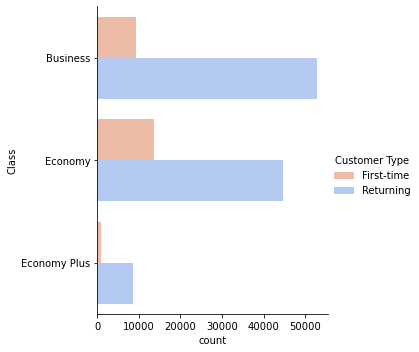

In [7]:
#checking return rate based on class

df_class = df[["Class", "Customer Type"]]
df_class=(df_class.groupby("Class")["Customer Type"]).value_counts()/df['Customer Type'].value_counts()['Returning']
#df_class

#Class         Customer Type
#Business      Returning        0.498860
#Economy       Returning        0.421065
#Economy Plus  Returning        0.080075

sns.catplot(y="Class", hue="Customer Type", kind="count",
            palette="coolwarm_r",
            data=df)

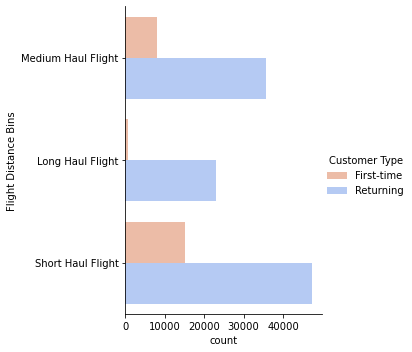

In [8]:
#checking return rate based on flight distance

df_distance = df[["Flight Distance Bins", "Customer Type"]]
df_distance=(df_distance.groupby("Flight Distance Bins")["Customer Type"].value_counts())/df['Customer Type'].value_counts()['Returning']
#df_distance

#Flight Distance Bins  Customer Type
#Long Haul Flight      Returning        0.216268
#Medium Haul Flight    Returning        0.337088
#Short Haul Flight     Returning        0.446645


sns.catplot(y="Flight Distance Bins", hue="Customer Type", kind="count",
            palette="coolwarm_r",
            data=df)

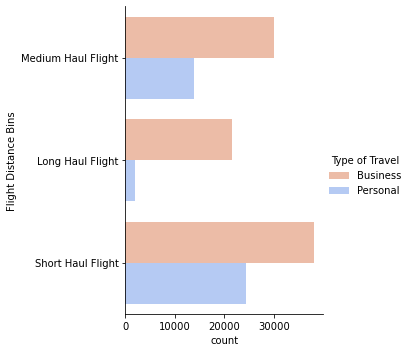

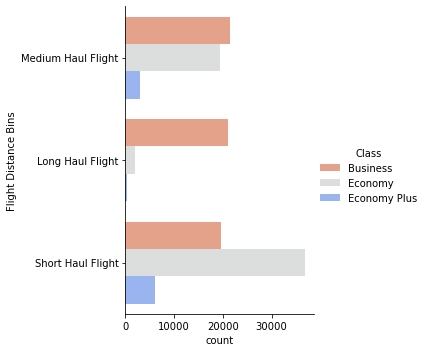

In [9]:
#Question3: Does flight distance affect customer preferences or flight patterns?

sns.catplot(y="Flight Distance Bins", hue="Type of Travel", kind="count",
            palette="coolwarm_r",
            data=df)
sns.catplot(y="Flight Distance Bins", hue="Class", kind="count",
            palette="coolwarm_r",
            data=df)